# Simulation datasets

These are designed for ...

In [1]:
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  

## Ornstein Uhlenbeck

In [2]:
from torchctrnn.data.simulations import OrnsteinUhlenbeckData

In [3]:
sim = OrnsteinUhlenbeckData()
df = sim.simulate(10,seed=1234)
df.head()

,t,y_t,obs,id
0,0.0,-0.303200,True,0
1,0.1,-0.374690,False,0
2,0.2,-0.391930,False,0
3,0.3,-0.400100,False,0
4,0.4,-0.447393,False,0


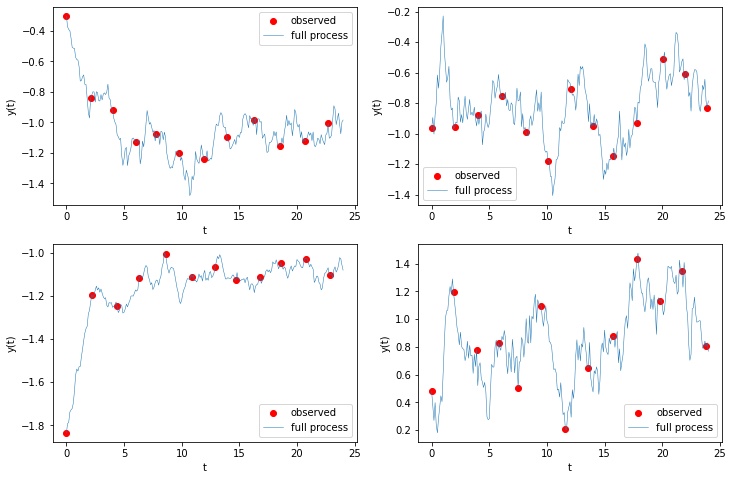

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (12,8))
_id = 0
for row in ax:
    for col in row:
        df_id = df.loc[(df.id == _id),:]
        col.scatter(df_id.t[df_id.obs],df_id.y_t[df_id.obs],label='observed',c='red')
        col.plot(df_id.t,df_id.y_t,linewidth=0.5,label='full process')
        col.set_xlabel('t')
        col.set_ylabel('y(t)')
        col.legend()
        _id += 1
plt.show()

## Blood glucose simulation

The glucose

In [5]:
from torchctrnn.data.simulations import GlucoseData

In [6]:
sim = GlucoseData()
df = sim.simulate(10,seed=1234)
df.head()

,id,t,glucose_t,glucose_t_obs,obs,insulin_t,dextrose_t,glucose_t_ind,glucose_t_pop
0,0,0.0,125.848949,125.848949,True,0.0,0.0,125.695427,125.660284
1,0,0.1,128.216933,128.216933,False,0.0,0.0,126.738583,126.361351
2,0,0.2,130.586911,130.586911,False,0.0,0.0,127.731052,127.028143
3,0,0.3,131.379341,131.379341,False,0.0,0.0,128.675295,127.662335
4,0,0.4,133.056805,133.056805,False,0.0,0.0,129.573656,128.265522


Example of process and observed

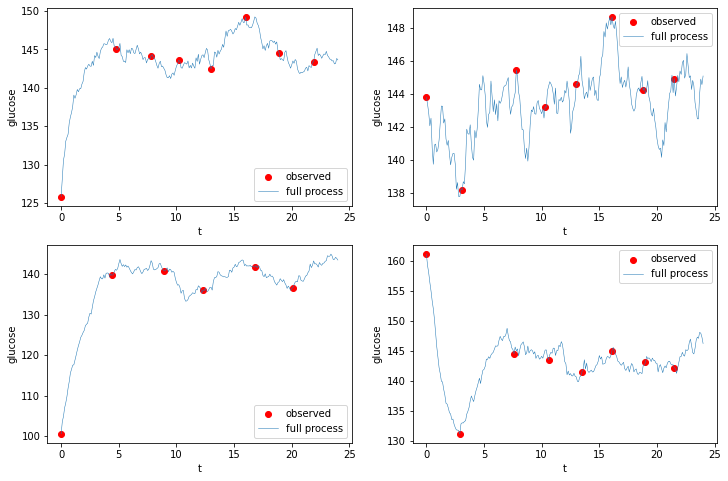

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (12,8))
_id = 0
for row in ax:
    for col in row:
        df_id = df.loc[(df.id == _id),:]
        col.scatter(df_id.t[df_id.obs],df_id.glucose_t[df_id.obs],label='observed',c='red')
        col.plot(df_id.t,df_id.glucose_t,linewidth=0.5,label='full process')
        col.set_xlabel('t')
        col.set_ylabel('glucose')
        col.legend()
        _id += 1
plt.show()

Showing the predictions too

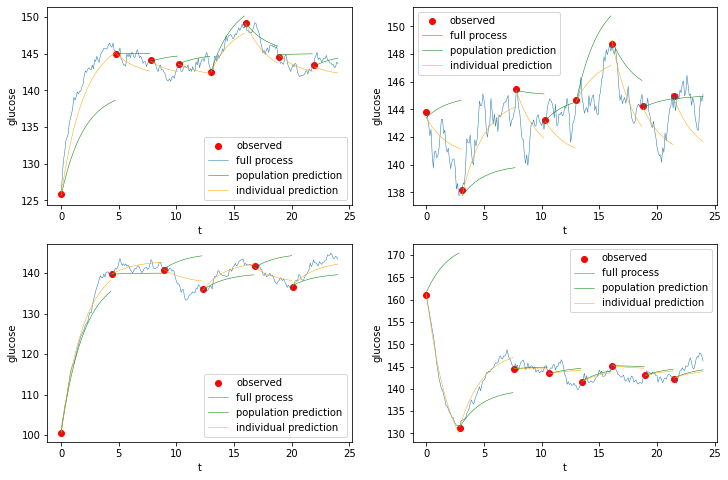

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (12,8))
_id = 0
for row in ax:
    for col in row:
        df_id = df.loc[(df.id == _id),:]
        df_id.loc[:,'segment'] = df_id.obs.cumsum()
        col.scatter(df_id.t[df_id.obs],df_id.glucose_t[df_id.obs],label='observed',c='red')
        col.plot(df_id.t,df_id.glucose_t,linewidth=0.5,label='full process')
        for segment in df_id.segment.unique():
            col.plot(df_id.loc[df_id.segment == segment,'t'],
                    df_id.loc[df_id.segment == segment,'glucose_t_pop'],
                    linewidth=0.5,label='population prediction' if segment == 1 else "",c='green')
            col.plot(df_id.loc[df_id.segment == segment,'t'],
                    df_id.loc[df_id.segment == segment,'glucose_t_ind'],
                linewidth=0.5,label='individual prediction' if segment == 1 else "",c='orange')
        col.set_xlabel('t')
        col.set_ylabel('glucose')
        col.legend()
        _id += 1
plt.show()

### With measurement error

In [9]:
sim = GlucoseData(measurement_error=0.02)
df = sim.simulate(10,seed=1234)
df.head()

,id,t,glucose_t,glucose_t_obs,obs,insulin_t,dextrose_t,glucose_t_ind,glucose_t_pop
0,0,0.0,125.848949,130.991622,True,0.0,0.0,125.695427,125.660284
1,0,0.1,128.216933,129.353942,False,0.0,0.0,126.738583,126.361351
2,0,0.2,130.586911,129.361854,False,0.0,0.0,127.731052,127.028143
3,0,0.3,131.379341,132.576378,False,0.0,0.0,128.675295,127.662335
4,0,0.4,133.056805,132.703853,False,0.0,0.0,129.573656,128.265522


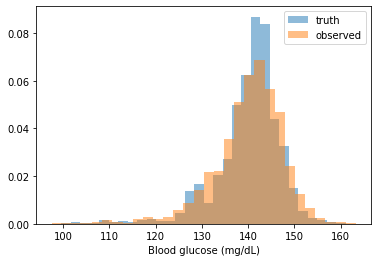

In [10]:
plt.hist(df.glucose_t,bins=30,alpha=0.5,label='truth',density=True)
plt.hist(df.glucose_t_obs,bins=30,alpha=0.5,label='observed',density=True)
plt.xlabel("Blood glucose (mg/dL)")
plt.legend()
plt.show()

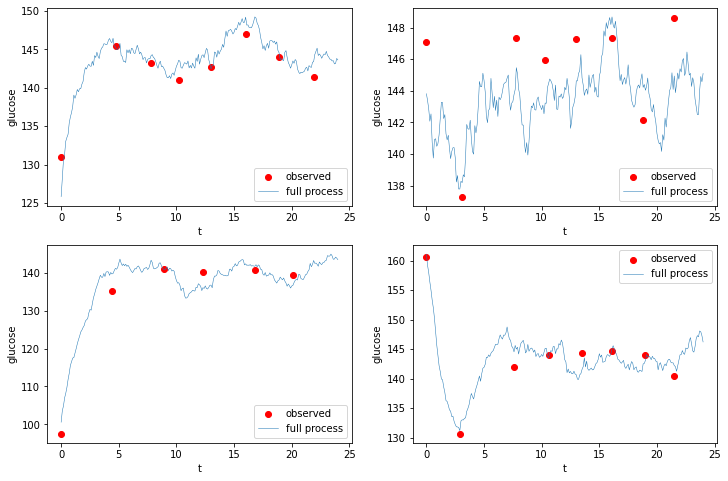

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (12,8))
_id = 0
for row in ax:
    for col in row:
        df_id = df.loc[(df.id == _id),:]
        col.scatter(df_id.t[df_id.obs],df_id.glucose_t_obs[df_id.obs],label='observed',c='red')
        col.plot(df_id.t,df_id.glucose_t,linewidth=0.5,label='full process')
        col.set_xlabel('t')
        col.set_ylabel('glucose')
        col.legend()
        _id += 1
plt.show()

### More details

The temporal process

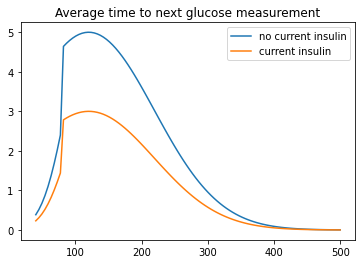

In [12]:
time_next = []
time_next_insulin = []
glucose = np.linspace(40,500,100)
for gl in np.linspace(40,500,100):
    if gl < 80:
        t_ = 5.0 * np.exp(-((gl - 120.0)/50.0) ** 2.0)
        t_insulin = 3.0 * np.exp(-((gl - 120.0)/50.0) ** 2.0)
    else:
        t_ = 5.0 * np.exp(-((gl - 120.0)/140.0) ** 2.0)
        t_insulin = 3.0 * np.exp(-((gl - 120.0)/140.0) ** 2.0)
    time_next.append(t_)
    time_next_insulin.append(t_insulin)
plt.plot(glucose,time_next,label="no current insulin")
plt.plot(glucose,time_next_insulin,label="current insulin")
plt.legend()
plt.title("Average time to next glucose measurement")
plt.show()

The treatment and glucose policy

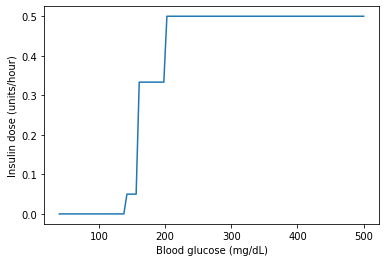

In [13]:
from torchctrnn.data.simulations import _Gluc_insulin_policy
glucose = np.linspace(40,500,100)
plt.plot(glucose,[_Gluc_insulin_policy(gl) for gl in glucose])
plt.xlabel("Blood glucose (mg/dL)")
plt.ylabel("Insulin dose (units/hour)")
plt.show()